# Training Deep Neural Networks

`Check table of initializers for each activation functions in the book (table 11-1)`

A good initialization strategy for ReLU activation funcition is He initialization so as to alleviate the exploding/vanishing gradient problem

"By default, Keras uses Glorot initialization with a uniform distribution. When you create a layer, you can switch to He initialization by setting kernel_initializer="he_uniform" or kernel_initializer="he_normal" like this:"

In [1]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

"Alternatively, you can obtain any of the initializations listed in table 11-1 and more using the VarianceScaling initializer. For example, if you want He initialization with a uniform distribution and based on fan_avg (rather than fan_in), you can use the following code:"

In [2]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

Better activation functions reduce instability of gradients

## Better activation functions

### Leaky ReLU

"Keras includes the classes LeakyReLU and PReLU in the tf.keras.layers package. Just like for other ReLU variants, you should use He initialization with these. For example:"

In [3]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.2) # defaults to alpha=0.3, alpha changed to "negative_slope"
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

We can also use LeakyReLU as a separate layer:

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[10]),
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"), # no activation
    tf.keras.layers.LeakyReLU(negative_slope=0.2), # activation as a separate layer
    tf.keras.layers.Dense(1)
])

### PReLU

In [5]:
leaky_prelu = tf.keras.layers.PReLU()
dense = tf.keras.layers.Dense(50, activation=leaky_prelu, kernel_initializer="he_normal")

Smooth variants of the ReLU activation function:

### ELU

In [6]:
dense = tf.keras.layers.Dense(50, activation="elu")

### SELU

In [7]:
dense = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal")

### GELU, Swish, Mish

In [8]:
dense = tf.keras.layers.Dense(50, activation="gelu", kernel_initializer="he_normal")
dense = tf.keras.layers.Dense(50, activation="swish", kernel_initializer="he_normal") # Keras does not support generalized Swish
# dense = tf.keras.layers.Dense(50, activation="mish", kernel_initializer="he_normal")  # Keras does not support mish

## Batch normalization

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

Looking at parameters of the first BN layer. 2 are trainable (by backpropagation) and 2 are not:

In [10]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

Adding BN layers before the activation functions this time:

In [11]:
# Removing bias on layers that come before BN since BN layers already has a bias term.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()    

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 300)                 │         235,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          30,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

## Gradient Clipping

In [12]:
# Normally used in RNN to mitigate exploding gradients
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0) # if you want to preserve orientation of gradient descent


## Transfer Learning with Keras

Use transfer learning for learning the `fashion` mnist dataset. I will pretend I only have 100 instances of each class on the training set. I will train an MLP to see its performance on 1000 samples, then I will use transfer learning to compare performance. The MLP whose layers I will transfer was trained on MNIST dataset with 50k samples on the training set and 98% accuracy on the validation set (10k samples).

In [13]:
import numpy as np
tf.keras.backend.clear_session()

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,), dtype=uint8)

In [16]:
print(X_train_full.shape)
X_train_full.dtype

(60000, 28, 28)


dtype('uint8')

In [17]:
X_train_1k = np.zeros(shape=(1000, 28, 28), dtype=np.uint8)
y_train_1k = np.zeros(shape=(1000,), dtype=np.uint8)

# get 100 instances from each class
for i in range(10):
    first_index = i*100
    indices = y_train_full == i
    x_100 = X_train_full[indices][:100]
    y_100 = y_train_full[indices][:100]
    X_train_1k[first_index : first_index + 100] = x_100
    y_train_1k[first_index : first_index + 100] = y_100
    

In [18]:
y_train_1k[90:110] # checking if it is correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [19]:
X_train_1k[0][1] # checking if it has non-zero values

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

In [20]:
indices_shuffled = np.random.default_rng(seed=42).permutation(y_train_1k.shape[0])
indices_shuffled[:10]

array([978, 933, 859, 916, 127, 608, 856, 260, 147, 810])

In [21]:
# shuffle dataset
X_train_1k = X_train_1k[indices_shuffled]
y_train_1k = y_train_1k[indices_shuffled]
y_train_1k[:10]

array([9, 9, 8, 9, 1, 6, 8, 2, 1, 8], dtype=uint8)

In [22]:
X_train = X_train_1k[:800]
y_train = y_train_1k[:800]
X_valid = X_train_1k[800:]
y_valid = y_train_1k[800:]

print(X_train.shape, y_train.shape)

(800, 28, 28) (800,)


In [23]:
model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_B.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
               )

In [24]:
history = model_B.fit(X_train, y_train,
                      validation_data=(X_valid, y_valid),
                     epochs=30,
                )

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3862 - loss: 103.9931 - val_accuracy: 0.5650 - val_loss: 16.5063
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6812 - loss: 7.4370 - val_accuracy: 0.6850 - val_loss: 6.0516
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7700 - loss: 4.5866 - val_accuracy: 0.6950 - val_loss: 5.0373
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8100 - loss: 2.7513 - val_accuracy: 0.7000 - val_loss: 4.9027
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8288 - loss: 2.1968 - val_accuracy: 0.7700 - val_loss: 2.6920
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8138 - loss: 2.3222 - val_accuracy: 0.7250 - val_loss: 3.1702
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8450 - loss: 1.5671 - val_accuracy: 0.7750 - val_loss: 2.5571
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8675 - loss: 1.2938 - val_accuracy: 0.7350 

In [25]:
model_B.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7400 - loss: 3.5459 


[3.5459048748016357, 0.7400000095367432]

In [26]:
model_B.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7105 - loss: 4.5890


[4.589045524597168, 0.7105000019073486]

Accuracy of model B on test set is 73%. Now, with transfer learning:

In [27]:
# Loading model A which was trained on the mnist dataset (on ch10 notebook)
model_A = tf.keras.models.clone_model(model_B)

# Compiling would be needed if the model were created from scratch
# model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00021647994826791666),
#                 loss="sparse_categorical_crossentropy",
#                 metrics=["accuracy"]
#                )

model_A.load_weights("../ch10/checkpoints_q10_mnist.weights.h5")

In [28]:
# Test if model was loaded correctly
(X_train_full_mnist, y_train_full_mnist), (X_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
model_A.evaluate(X_test_mnist, y_test_mnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9817 - loss: 0.1447


[0.14471349120140076, 0.9817000031471252]

In [29]:
# cloning model so model A is not affected by training new model
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [30]:
# copying bottom 2 hidden layers ( + flatten layer)
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:3])
model_B_on_A.add(tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"))
model_B_on_A.add(tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"))
model_B_on_A.add(tf.keras.layers.Dense(480, activation="relu", kernel_initializer="he_normal"))
model_B_on_A.add(tf.keras.layers.Dense(10, activation="softmax"))

In [31]:
# Freeze bottom 2 layers
for layer in model_B_on_A.layers[:3]:
    layer.trainable = False

# Always compile after freezing/unfreezing layers
model_B_on_A.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
               )

In [32]:
history = model_B_on_A.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5213 - loss: 27.7644 - val_accuracy: 0.6350 - val_loss: 10.5066
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7362 - loss: 5.7865 - val_accuracy: 0.6500 - val_loss: 5.3905
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8525 - loss: 1.6703 - val_accuracy: 0.7050 - val_loss: 3.5750
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9175 - loss: 1.0327 - val_accuracy: 0.6800 - val_loss: 4.2726
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9438 - loss: 0.4279 - val_accuracy: 0.6900 - val_loss: 5.4015
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9438 - loss: 1.2141 - val_accuracy: 0.7100 - val_loss: 4.8249
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9588 - loss: 1.0386 - val_accuracy: 0.6850 - val_loss: 4.9892
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9500 - loss: 0.5104 - val_accuracy: 0.6800 -

In [33]:
# Unfreeze bottom 2 layers to fine-tune
for layer in model_B_on_A.layers[:3]:
    layer.trainable = True

# Always compile after freezing/unfreezing layers
model_B_on_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
               )

In [34]:
history = model_B_on_A.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9737 - loss: 0.1771 - val_accuracy: 0.7100 - val_loss: 3.3258
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9800 - loss: 0.0879 - val_accuracy: 0.7100 - val_loss: 3.4084
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9875 - loss: 0.0530 - val_accuracy: 0.7100 - val_loss: 3.5990
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9962 - loss: 0.0158 - val_accuracy: 0.6900 - val_loss: 3.5152
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9950 - loss: 0.0226 - val_accuracy: 0.7000 - val_loss: 3.4123
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.7100 - val_loss: 3.3632
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 2.7837e-04 - val_accuracy: 0.7050 - val_loss: 3.3757
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 6.8819e-05 - val_accuracy: 0.

In [35]:
model_B_on_A.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7349 - loss: 3.9364


[3.9363629817962646, 0.7348999977111816]

The loss increased and the accuracy decreased a bit. Transfer learning did not help much here probably because I should have used 1 hidden layer (because tasks are very different) or trained the NN with frozen layers for more epochs.

The author says "transfer learning does not work very well with small dense networks, presumably because small networks learn few patterns, and dense networks learn very specific patterns, which are unlikely to be useful in other tasks.

##  Faster Optimizers

Momentum

In [36]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

Nesterov Accelerated Gradient (NAG)

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

RMSProp

In [38]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

Adam

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Adamax, Nadam, AdamW

In [40]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, beta_1=0.9, beta_2=0.999, weight_decay=0.96)
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

"Combining l2 regularization with Adam often results in models that do not generalize well." Use adam with weight decay (adamW) instead.
Sometimes, adaptive gradients (RMSProp, adam and its variations) do not generalize well

See table 11-2 for optimizers comparison

## Learning Rate Scheduling

Exponential scheduling (or exponential decay)

In [41]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

# if you do not want to hardcode function 
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [42]:
# Create a LearningRateScheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Example
# history = model.fit(X_train, y_train, epochs=10, callbacks=[lr_schedueler]) 

The scheudle function can optionally take the current learning rate as a second argument:

In [43]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

`When saving a model, the epoch does not get saved! If training again after loading model the epoch will start at 0! To solve this, use a learning schedule function independent of epoch or use fit()'s initial_epoch parameter`

Piecewise constant scheduling

In [44]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

# Can create a more general function if I do not want to hardcode epoch thresholds just like previous section

Performance scheduling

In [45]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
# this multiplies learning rate by 0.5 if best validation loss does not improve for 5 consecutive epochs

Alternative to implementing learning rate scheduling:

In [46]:
batch_size = 32
n_epochs = 20
n_steps = n_epochs * np.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=scheduled_learning_rate)

The code above "is nice and simple, plus when you save the model, the learning rate and its schedule (including its state) get saved as well."

In [47]:
# Implement power scheduling
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

##  Avoid overfitting through regularization

### $l_1$ and $l_2$ regularization

In [48]:
# l2
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)
                             )
# l1
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1(0.01)
                             )
# l1 and l2
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)
                             )

You tipically want to apply the same activation function, initializer, and regularizer in all hidden layers. To avoid too much repetition, you can use loops or Python's functools.partial() function, which lets you creat a thin wrapper for any callable, with some default argument values:

In [49]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                 activation="relu",
                 kernel_initializer="he_normal",
                 kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

### Dropout

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2450 - loss: 111.8622 - val_accuracy: 0.5050 - val_loss: 15.9244
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3738 - loss: 32.6153 - val_accuracy: 0.5400 - val_loss: 6.5472
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3650 - loss: 11.7799 - val_accuracy: 0.4500 - val_loss: 3.1984
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3950 - loss: 6.1486 - val_accuracy: 0.3900 - val_loss: 2.6666
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3762 - loss: 4.7306 - val_accuracy: 0.3900 - val_loss: 2.4695
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3325 - loss: 3.9130 - val_accuracy: 0.3650 - val_loss: 2.1150
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3262 - loss: 3.3753 - val_accuracy: 0.3100 - val_loss: 2.3502
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2788 - loss: 2.8318 - val_accuracy: 0.2950 - val

In [51]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3200 - loss: 1.7167 


[1.7167494297027588, 0.3199999928474426]

In [52]:
model.evaluate(X_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3468 - loss: 1.8532


[1.8531763553619385, 0.3467999994754791]

"Since dropout is only active during training, comparing the training loss and the validation loss can be misleading. In particular, a model may be overfitting the training set and yet have a similar training and validation losses. So, make sure to evaluate the training loss without dropout (e.g. after training)"

### Monte Carlo (MC) Dropout

In [53]:
import numpy as np

y_probas = np.stack([model(X_test, training=True) 
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [54]:
# when dropout is turned off
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.107, 0.048, 0.138, 0.102, 0.134, 0.051, 0.121, 0.053, 0.125,
        0.12 ]], dtype=float32)

In [55]:
# with MC dropout prediction
y_proba[0].round(3)

array([0.102, 0.046, 0.13 , 0.096, 0.127, 0.1  , 0.118, 0.051, 0.118,
       0.113], dtype=float32)

In [56]:
# standard deviation
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.024, 0.011, 0.033, 0.024, 0.031, 0.206, 0.039, 0.012, 0.028,
       0.028], dtype=float32)

In [57]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
print(accuracy)

0.4275


Accuracy improved from 37% to 43.8%!

"If  your model contains other layers that behave in a special way during training (such as BatchNormalization), then you should not force training model like we just did. Instad, you should replace the Dropout layers with the following MCDropout class:"

In [58]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)

###  Max-Norm Regularization

In [59]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

# Answer to open-ended questions:

1. To alleviate the unstable gradient problem.
2. It is not ok, because all neurons in a layer would have the same gradients and the entire layer would be equivalent to a single neuron multiplied by number of neurons in the layer. This would not generalize well as it would feel like there is a single neuron per hidden layer.
3.  I think, if all weights are initialized correctly, it is ok.
4.  Leaky Relu or Relu for faster (or just shallow) neural nets. SELU for deep dense nets. Swish, mish, GELU for any deep nets.
5.  Momentum's peak "speed" becomes much larger. However, it also takes longer to slow down.
6.  Use strong $l_1$ regularization, TF-mot package, and get rid of tiny weights.
7.  Dropout does slow down training because it is as if we are training a different model everytime. It does not slow down inference. MC dropout does slow down inferece because it makes the model predict on the same instance multiple times. 

Solution:

1. Glorot initialization and He initialization were designed to make the output standard deviation as close as possible to the input standard deviation, at least at the beginning of training. This reduces the vanishing/exploding gradients problem.
2. No, all weights should be sampled independently; they should not all have the same initial value. One important goal of sampling weights randomly is to break symmetry: if all the weights have the same initial value, even if that value is not zero, then symmetry is not broken (i.e., all neurons in a given layer are equivalent), and backpropagation will be unable to break it. Concretely, this means that all the neurons in any given layer will always have the same weights. It's like having just one neuron per layer, and much slower. It is virtually impossible for such a configuration to converge to a good solution.
3. It is perfectly fine to initialize the bias terms to zero. Some people like to initialize them just like weights, and that's OK too; it does not make much difference.
4. ReLU is usually a good default for the hidden layers, as it is fast and yields good results. Its ability to output precisely zero can also be useful in some cases (e.g., see Chapter 17). Moreover, it can sometimes benefit from optimized implementations as well as from hardware acceleration. The leaky ReLU variants of ReLU can improve the model's quality without hindering its speed too much compared to ReLU. For large neural nets and more complex problems, GLU, Swish and Mish can give you a slightly higher quality model, but they have a computational cost. The hyperbolic tangent (tanh) can be useful in the output layer if you need to output a number in a fixed range (by default between –1 and 1), but nowadays it is not used much in hidden layers, except in recurrent nets. The sigmoid activation function is also useful in the output layer when you need to estimate a probability (e.g., for binary classification), but it is rarely used in hidden layers (there are exceptions—for example, for the coding layer of variational autoencoders; see Chapter 17). The softplus activation function is useful in the output layer when you need to ensure that the output will always be positive. The softmax activation function is useful in the output layer to estimate probabilities for mutually exclusive classes, but it is rarely (if ever) used in hidden layers.
5. If you set the `momentum` hyperparameter too close to 1 (e.g., 0.99999) when using an `SGD` optimizer, then the algorithm will likely pick up a lot of speed, hopefully moving roughly toward the global minimum, but its momentum will carry it right past the minimum. Then it will slow down and come back, accelerate again, overshoot again, and so on. It may oscillate this way many times before converging, so overall it will take much longer to converge than with a smaller `momentum` value.
6. One way to produce a sparse model (i.e., with most weights equal to zero) is to train the model normally, then zero out tiny weights. For more sparsity, you can apply ℓ<sub>1</sub> regularization during training, which pushes the optimizer toward sparsity. A third option is to use the TensorFlow Model Optimization Toolkit.
7. Yes, dropout does slow down training, in general roughly by a factor of two. However, it has no impact on inference speed since it is only turned on during training. MC Dropout is exactly like dropout during training, but it is still active during inference, so each inference is slowed down slightly. More importantly, when using MC Dropout you generally want to run inference 10 times or more to get better predictions. This means that making predictions is slowed down by a factor of 10 or more.

8. My answer to coding question:

In [89]:
tf.random.set_seed(42)

In [60]:
class exponential_lr(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.losses = []
        self.rates = []
        
    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [61]:
import matplotlib.pyplot as plt

def plot(model, X_train, y_train, lr0=1e-5, factor=1.005):
    clone = tf.keras.models.clone_model(model)
    clone.set_weights(model.get_weights())
    
    expo_lr = exponential_lr(factor=factor)
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
    clone.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    history = clone.fit(X_train, y_train,
                        epochs=1,
                        validation_split=0.1,
                        callbacks=[expo_lr]
                       )

    losses = expo_lr.losses
    rates = expo_lr.rates

    plt.plot(rates, losses)
    plt.gca().set_xscale("log")
    plt.grid()
    plt.xlabel("Learning rate (log)")
    plt.ylabel("Loss")
    plt.show()

In [62]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

C:\Users\ianvi\env\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [63]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [64]:
classes =  ["airplane" , "automobile" , "bird" , "cat" , "deer", "dog", "frog", "horse", "ship", "truck"]

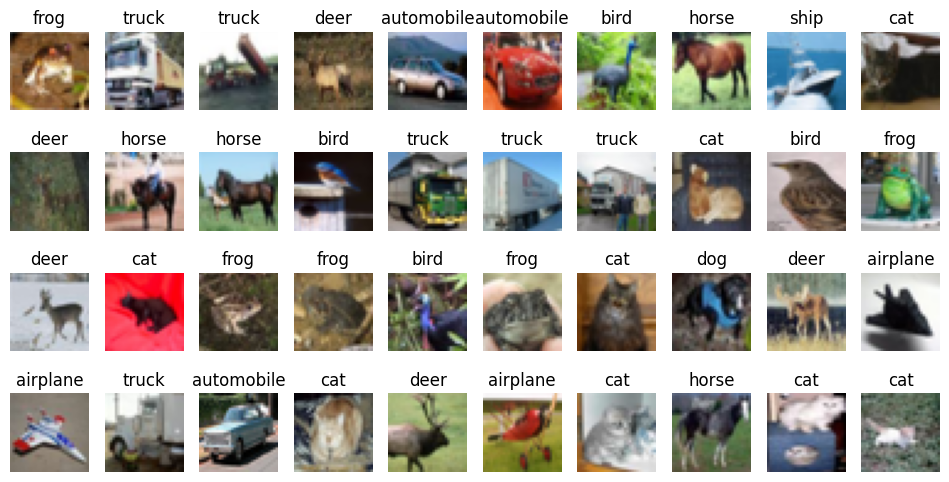

In [65]:
num = 40

plt.figure(figsize=(12,6))

for i in range(num):
    plt.subplot(4, 10, i + 1)
    plt.title(classes[y_train[i][0]])
    plt.imshow(X_train[i])
    plt.axis("off")
    
plt.show()

In [66]:
deep_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten()
])
hidden = partial(tf.keras.layers.Dense,
                 units=100,
                 activation="swish",
                 kernel_initializer="he_normal"
                )

for _ in range(20):
    deep_nn.add(hidden())

deep_nn.add(tf.keras.layers.Dense(10, activation="softmax"))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1181 - loss: 5.0244 - val_accuracy: 0.0980 - val_loss: 2.3511


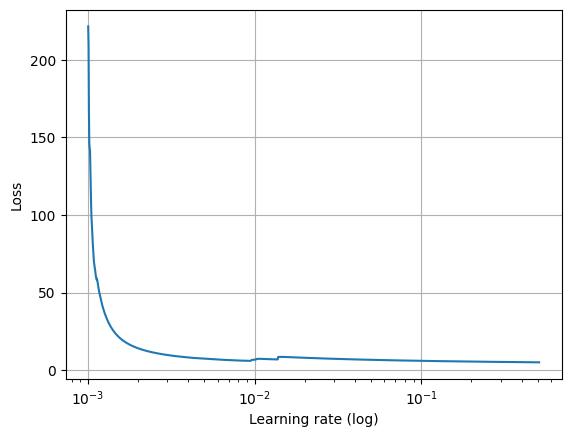

In [67]:
plot(deep_nn, X_train, y_train, lr0=1e-3, factor=1.005)

It jumps up a bit after 1.4e-2, I tried this value divided by 10, and 100 and 1.4e-4 worked better here

In [68]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1.4e-4)
deep_nn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"])

early_stop = tf.keras.callbacks.EarlyStopping(patience=10,
                                             restore_best_weights=True)

history = deep_nn.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      callbacks=[early_stop])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.1754 - loss: 3.8648 - val_accuracy: 0.2227 - val_loss: 2.0904
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2590 - loss: 2.0227 - val_accuracy: 0.2868 - val_loss: 1.9816
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.2985 - loss: 1.9145 - val_accuracy: 0.3246 - val_loss: 1.8696
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3286 - loss: 1.8485 - val_accuracy: 0.3317 - val_loss: 1.8361
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3461 - loss: 1.7981 - val_accuracy: 0.3415 - val_loss: 1.8117
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3603 - loss: 1.7611 - val_accuracy: 0.3706 - val_loss: 1.7482
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3751 - loss: 1.7312 - val_accuracy: 0.3523 - val_loss: 1.7709
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 

In [69]:
deep_nn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4634 - loss: 1.5220


[1.5220316648483276, 0.4634000062942505]

The accuracy is bad: 46.3%. Now trying with batch normalization.

In [70]:
deep_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten()
])
hidden = partial(tf.keras.layers.Dense,
                 units=100,
                 activation="swish",
                 kernel_initializer="he_normal"
                )

for _ in range(20):
    deep_nn.add(tf.keras.layers.BatchNormalization())
    deep_nn.add(hidden())

deep_nn.add(tf.keras.layers.BatchNormalization())
deep_nn.add(tf.keras.layers.Dense(10, activation="softmax"))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.1530 - loss: 8.9349 - val_accuracy: 0.1014 - val_loss: 9986992864234246047990284288.0000


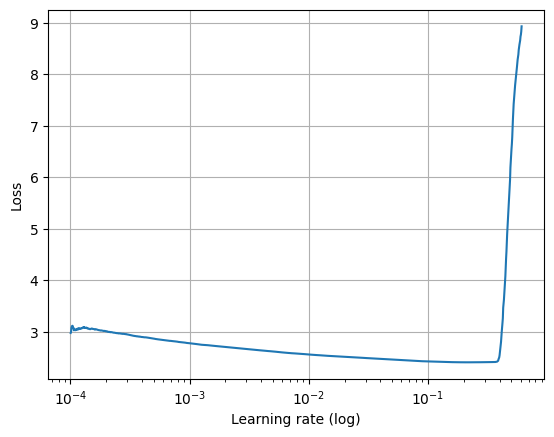

In [71]:
plot(deep_nn, X_train, y_train, lr0=1e-4, factor=1.007)

The learning rate shoots up after 3e-1, so I will try 3e-4. I tried many learning rates and this one seemed to perform best.

In [72]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=3e-4)

deep_nn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10,
                                             restore_best_weights=True)
history = deep_nn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.1307 - loss: 2.4311 - val_accuracy: 0.1872 - val_loss: 2.3428
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2235 - loss: 2.0980 - val_accuracy: 0.2688 - val_loss: 2.0049
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2806 - loss: 1.9496 - val_accuracy: 0.3097 - val_loss: 1.8738
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.3202 - loss: 1.8618 - val_accuracy: 0.3534 - val_loss: 1.7848
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.3550 - loss: 1.7892 - val_accuracy: 0.3851 - val_loss: 1.7112
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3772 - loss: 1.7358 - val_accuracy: 0.4080 - val_loss: 1.6555
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3965 - loss: 1.6899 - val_accuracy: 0.4204 - val_loss: 1.6184
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 

In [73]:
deep_nn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5165 - loss: 1.3975


[1.3975112438201904, 0.5164999961853027]

Batch normalization did improve the test accuracy by a 5% increment. Model with batch normalization took longer to train. It took a bit less epochs but each epoch takes longer to finish.

Now trying with SELU activation function:

In [161]:
X_valid = X_train[-5000:]
y_valid = y_train[-5000:]
X_train_reduced = X_train[:-5000]
y_train_reduced = y_train[:-5000]

In [169]:
deep_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization()
])
hidden = partial(tf.keras.layers.Dense,
                 units=100,
                 activation="selu",
                 kernel_initializer="lecun_normal"
                )

for _ in range(20):
    deep_nn.add(hidden())

deep_nn.add(tf.keras.layers.Dense(10, activation="softmax"))

In [170]:
X_train_reduced_flattened = deep_nn.layers[0](X_train_reduced)
deep_nn.layers[1].adapt(X_train_reduced_flattened)

In [171]:
def plot_selu(model, X_train, y_train, X_valid, y_valid, lr0=1e-5, factor=1.005):
    clone = tf.keras.models.clone_model(model)
    clone.set_weights(model.get_weights())
    
    expo_lr = exponential_lr(factor=factor)
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train,
                        epochs=1,
                        validation_data=(X_valid, y_valid),
                        callbacks=[expo_lr]
                       )

    losses = expo_lr.losses
    rates = expo_lr.rates

    plt.plot(rates, losses)
    plt.gca().set_xscale("log")
    plt.grid()
    plt.xlabel("Learning rate (log)")
    plt.ylabel("Loss")
    plt.show()

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1180 - loss: 117.5687 - val_accuracy: 0.0976 - val_loss: 828.4017


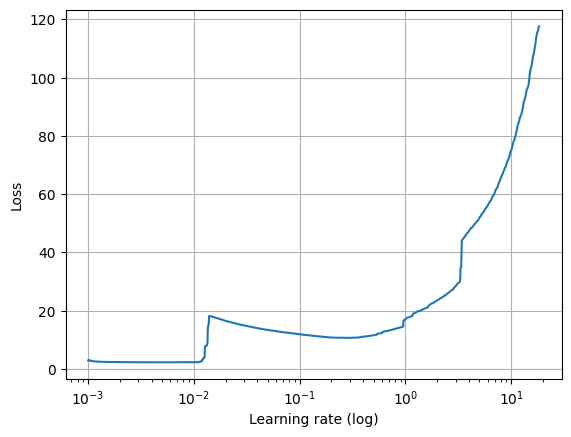

In [172]:
plot_selu(deep_nn, X_train_reduced, y_train_reduced, X_valid, y_valid, lr0=1e-3, factor=1.007)

It goes up after 1e-2, so I will try 1e-3

In [173]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)

deep_nn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10,
                                             restore_best_weights=True)

history = deep_nn.fit(
    X_train_reduced, y_train_reduced,
    validation_data=(X_valid, y_valid),
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.2938 - loss: 1.9580 - val_accuracy: 0.3266 - val_loss: 1.8780
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3732 - loss: 1.7481 - val_accuracy: 0.3908 - val_loss: 1.7293
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4090 - loss: 1.6644 - val_accuracy: 0.4194 - val_loss: 1.6690
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4351 - loss: 1.6023 - val_accuracy: 0.4230 - val_loss: 1.6648
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4558 - loss: 1.5471 - val_accuracy: 0.4228 - val_loss: 1.6582
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4720 - loss: 1.5097 - val_accuracy: 0.4512 - val_loss: 1.5922
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4815 - loss: 1.4777 - val_accuracy: 0.4428 - val_loss: 1.5981
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0

In [174]:
deep_nn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4659 - loss: 1.5525


[1.5524860620498657, 0.4659000039100647]

Selu activation is a bit worse compared to previous models: test accuracy is 46.6%. But it converged faster than previous models. It is overfitting a bit too. Now trying with alpha dropout:

In [199]:
dropout_rate = 0.2

deep_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization(),
    tf.keras.layers.AlphaDropout(dropout_rate)
])
hidden = partial(tf.keras.layers.Dense,
                 units=100,
                 activation="selu",
                 kernel_initializer="lecun_normal"
                )

for _ in range(20):
    deep_nn.add(hidden())
    deep_nn.add(tf.keras.layers.AlphaDropout(dropout_rate))

deep_nn.add(tf.keras.layers.Dense(10, activation="softmax"))

In [200]:
X_train_reduced_flattened = deep_nn.layers[0](X_train_reduced)
deep_nn.layers[1].adapt(X_train_reduced_flattened)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.1044 - loss: nan - val_accuracy: 0.0986 - val_loss: nan


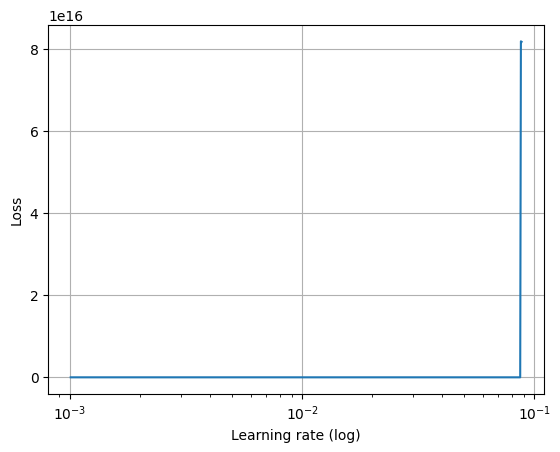

In [201]:
plot_selu(deep_nn, X_train_reduced, y_train_reduced, X_valid, y_valid, lr0=1e-3, factor=1.007)

It shoots up after 9e-2, trying 9e-4

In [202]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=9e-4)

deep_nn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10,
                                             restore_best_weights=True)
history = deep_nn.fit(
    X_train_reduced, y_train_reduced,
    validation_data=(X_valid, y_valid),
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.1456 - loss: 2.3142 - val_accuracy: 0.1808 - val_loss: 140.3200
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.1707 - loss: 2.1069 - val_accuracy: 0.1716 - val_loss: 139.7360
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1859 - loss: 2.0505 - val_accuracy: 0.1626 - val_loss: 115.2352
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2220 - loss: 2.0037 - val_accuracy: 0.1776 - val_loss: 67.6269
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2409 - loss: 1.9703 - val_accuracy: 0.1444 - val_loss: 48.4131
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2457 - loss: 1.9627 - val_accuracy: 0.1416 - val_loss: 34.5181
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2435 - loss: 1.9783 - val_accuracy: 0.1858 - val_loss: 31.7195
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - 

In [203]:
deep_nn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1807 - loss: 28.1645


[28.164522171020508, 0.18070000410079956]

Trying MC dropout:

In [204]:
y_probas = np.stack([deep_nn(X_test, training=True) 
                     for _ in range(100)])

y_proba = y_probas.mean(axis=0)

y_result = y_proba.argmax(axis=1)

accuracy = (y_result == y_test.flatten()).sum() / y_test.shape[0]


In [205]:
print(accuracy)

0.2629


Yikes! Still bad, but some improvement.

Now implementing 1cycle scheduling:

In [206]:
class OneCycle(tf.keras.callbacks.Callback):
    def __init__(self, epochs, lr1, momentum0, **kwargs):
        self.lr1 = lr1
        self.momentum0 = momentum0
        self.lr0 = kwargs.get("lr0", lr1 / 10)
        self.momentum1 = kwargs.get("momentum1", momentum0 - 0.10)
        
        self.lr_increment = tf.constant((self.lr1 - self.lr0) / np.floor((epochs - 1) / 2))
        self.momentum_increment = tf.constant((self.momentum1 - self.momentum0) / np.floor((epochs - 1) / 2))
        self.lr_decrement = tf.constant((self.lr1 - self.lr0) / np.ceil((epochs - 1) / 2))
        self.momentum_decrement = tf.constant((self.momentum1 - self.momentum0) / np.ceil((epochs - 1) / 2))
        
        self.epochs = epochs
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch < self.epochs:
            if epoch < np.ceil(self.epochs / 2 - 1):
                self.model.optimizer.learning_rate += self.lr_increment
                self.model.optimizer.beta_1 += self.momentum_increment
            else:
                self.model.optimizer.learning_rate -= self.lr_decrement
                self.model.optimizer.beta_1 -= self.momentum_decrement


In [225]:
dropout_rate = 0.1

deep_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Normalization(),
    tf.keras.layers.AlphaDropout(dropout_rate)
])
hidden = partial(tf.keras.layers.Dense,
                 units=100,
                 activation="selu",
                 kernel_initializer="lecun_normal"
                )

for _ in range(20):
    deep_nn.add(hidden())
    deep_nn.add(tf.keras.layers.AlphaDropout(dropout_rate))

deep_nn.add(tf.keras.layers.Dense(10, activation="softmax"))

In [226]:
X_train_reduced_flattened = deep_nn.layers[0](X_train_reduced)
deep_nn.layers[1].adapt(X_train_reduced_flattened)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.1071 - loss: nan - val_accuracy: 0.0986 - val_loss: nan


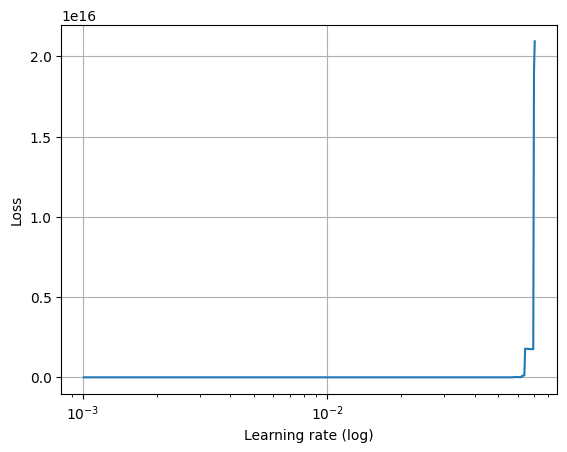

In [227]:
plot_selu(deep_nn, X_train_reduced, y_train_reduced, X_valid, y_valid, lr0=1e-3, factor=1.007)

It goes up when learning rate is about 6e-2. Using 6e-4

In [228]:
oc = OneCycle(40, 6e-4, 0.95)
optimizer = tf.keras.optimizers.Nadam(learning_rate=oc.lr0, beta_1=oc.momentum0)

deep_nn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10,
                                             restore_best_weights=True)
history = deep_nn.fit(
    X_train_reduced, y_train_reduced,
    validation_data=(X_valid, y_valid),
    epochs=40,
    callbacks=[early_stop, oc]
)

Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.1347 - loss: 2.6340 - val_accuracy: 0.1572 - val_loss: 2.5161
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.1556 - loss: 2.3349 - val_accuracy: 0.1706 - val_loss: 2.2754
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.1693 - loss: 2.1780 - val_accuracy: 0.2174 - val_loss: 2.2025
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.2181 - loss: 2.0393 - val_accuracy: 0.2376 - val_loss: 2.5404
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.2347 - loss: 1.9788 - val_accuracy: 0.2466 - val_loss: 2.8253
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.2623 - loss: 1.9335 - val_accuracy: 0.2524 - val_loss: 3.7664
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.2946 - loss: 1.8838 - val_accuracy: 0.2750 - val_loss: 5.5974
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.3130 -

In [229]:
deep_nn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2111 - loss: 2.1769


[2.176859140396118, 0.2110999971628189]

3% better than constant learning  and converged faster too (with respect to epochs).

## Author's solutions:

## 8. Deep Learning on CIFAR10

### a.
*Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the Swish activation function.*

In [232]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3])) # This is not in the solution, but TF does not like when sequential model does not have this layer
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal")
             )

### b.
*Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `tf.keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.*

In [233]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's use a Nadam optimizer with a learning rate of 5e-5. I tried learning rates 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 and 1e-2, and I compared their learning curves for 10 epochs each (using the TensorBoard callback, below). The learning rates 3e-5 and 1e-4 were pretty good, so I tried 5e-5, which turned out to be slightly better.

In [234]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

Let's load the CIFAR10 dataset. We also want to use early stopping, so we need a validation set. Let's use the first 5,000 images of the original training set as the validation set:

In [235]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Now we can create the callbacks we need and train the model:

In [237]:
from pathlib import Path

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model.keras",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [268]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18892), started 1:24:27 ago. (Use '!kill 18892' to kill it.)

In [239]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1495 - loss: 3.5822 - val_accuracy: 0.2178 - val_loss: 2.1486
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2350 - loss: 2.0739 - val_accuracy: 0.2590 - val_loss: 2.0011
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.2819 - loss: 1.9520 - val_accuracy: 0.3030 - val_loss: 1.8999
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.3119 - loss: 1.8783 - val_accuracy: 0.3282 - val_loss: 1.8324
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.3380 - loss: 1.8199 - val_accuracy: 0.3454 - val_loss: 1.8004
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.3623 - loss: 1.7639 - val_accuracy: 0.3654 - val_loss: 1.7420
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.3811 - loss: 1.7172 - val_accuracy: 0.3906 - val_loss: 1.6757
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 

In [240]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4424 - loss: 1.5584


[1.5583574771881104, 0.4424000084400177]

In [241]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4536 - loss: 1.5391


[1.5391045808792114, 0.4535999894142151]

The model with the lowest validation loss gets about 46.8% accuracy on the validation set. It took 29 epochs to reach the lowest validation loss, with roughly 10 seconds per epoch on my laptop (without a GPU). Let's see if we can improve the model using Batch Normalization.

### c.
*Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*

The code below is very similar to the code above, with a few changes:

* I added a BN layer after every Dense layer (before the activation function), except for the output layer.
* I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
* I renamed the run directories to run_bn_* and the model file name to `my_cifar10_bn_model`.

In [243]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.keras",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step - accuracy: 0.2480 - loss: 2.0482 - val_accuracy: 0.3238 - val_loss: 1.8771
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.3557 - loss: 1.7844 - val_accuracy: 0.3634 - val_loss: 1.7435
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.4009 - loss: 1.6665 - val_accuracy: 0.3462 - val_loss: 1.8564
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.4332 - loss: 1.5884 - val_accuracy: 0.3754 - val_loss: 1.7450
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.4616 - loss: 1.5167 - val_accuracy: 0.3870 - val_loss: 1.7469
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.4842 - loss: 1.4506 - val_accuracy: 0.3960 - val_loss: 1.7446
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.5108 - loss: 1.3861 - val_accuracy: 0.3994 - val_loss: 1.7494
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 

[1.731715202331543, 0.4106000065803528]

In [244]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4235 - loss: 1.7043


[1.7043468952178955, 0.4235000014305115]

* *Is the model converging faster than before?* Much faster! The previous model took 29 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 12 epochs and continued to make progress until the 17th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* *Does BN produce a better model?* Yes! The final model is also much better, with 50.7% validation accuracy instead of 46.7%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* *How does BN affect training speed?* Although the model converged much faster, each epoch took about 15s instead of 10s, because of the extra computations required by the BN layers. But overall the training time (wall time) to reach the best model was shortened by about 10%.

### d.
*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*

In [245]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model.keras", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.3255 - loss: 1.8865 - val_accuracy: 0.3606 - val_loss: 1.7797
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.3973 - loss: 1.6932 - val_accuracy: 0.4316 - val_loss: 1.6727
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.4328 - loss: 1.6093 - val_accuracy: 0.4376 - val_loss: 1.6326
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.4602 - loss: 1.5380 - val_accuracy: 0.4594 - val_loss: 1.5854
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.4795 - loss: 1.4853 - val_accuracy: 0.4680 - val_loss: 1.5759
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.4989 - loss: 1.4411 - val_accuracy: 0.4588 - val_loss: 1.6211
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.5123 - loss: 1.4020 - val_accuracy: 0.4758 - val_loss: 1.5831
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 

[1.5322052240371704, 0.498199999332428]

In [247]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4883 - loss: 1.5417


[1.5417239665985107, 0.48829999566078186]

This model reached the first model's validation loss in just 8 epochs. After 14 epochs, it reached its lowest validation loss, with about 50.3% accuracy, which is better than the original model (46.7%), but not quite as good as the model using batch normalization (50.7%). Each epoch took only 9 seconds. So it's the fastest model to train so far.

### e.
*Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.*

**Warning**: there are now two versions of `AlphaDropout`. One is deprecated and also broken in some recent versions of TF, and unfortunately that's the version in the `tensorflow` library. Luckily, there's a perfectly fine version in the `keras` library (i.e., `keras`, not `tf.keras`). It's neither deprecated nor broken, so let's import and use that one:

In [248]:
import keras.layers

In [249]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model.keras", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.3251 - loss: 1.8973 - val_accuracy: 0.3762 - val_loss: 1.7794
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.4079 - loss: 1.6771 - val_accuracy: 0.4148 - val_loss: 1.6560
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.4441 - loss: 1.5845 - val_accuracy: 0.4470 - val_loss: 1.6063
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.4682 - loss: 1.5189 - val_accuracy: 0.4612 - val_loss: 1.6187
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4912 - loss: 1.4619 - val_accuracy: 0.4678 - val_loss: 1.5752
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.5072 - loss: 1.4159 - val_accuracy: 0.4634 - val_loss: 1.6135
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.5250 - loss: 1.3683 - val_accuracy: 0.4846 - val_loss: 1.5532
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 

[1.553235650062561, 0.4846000075340271]

In [250]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4887 - loss: 1.5473


[1.5473002195358276, 0.4887000024318695]

The model reaches 48.1% accuracy on the validation set. That's worse than without dropout (50.3%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

Let's use MC Dropout now. We will need the `MCAlphaDropout` class we used earlier, so let's just copy it here for convenience:

In [251]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [252]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [253]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [254]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.float64(0.4864)



We get back to roughly the accuracy of the model without dropout in this case (about 50.3% accuracy).

So the best model we got in this exercise is the Batch Normalization model.


### f.
*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*

In [255]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

The `ExponentialLearningRate` custom callback updates the learning rate during training, at the end of each batch. It multiplies it by a constant `factor`. It also saves the learning rate and loss at each batch. Since `logs["loss"]` is actually the mean loss since the start of the epoch, and we want to save the batch loss instead, we must compute the mean times the number of batches since the beginning of the epoch to get the total loss so far, then we subtract the total loss at the previous batch to get the current batch's loss.

In [256]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

The `find_learning_rate()` function trains the model using the `ExponentialLearningRate` callback, and it returns the learning rates and corresponding batch losses. At the end, it restores the model and its optimizer to their initial state.

In [260]:
import math

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

The `plot_lr_vs_loss()` function plots the learning rates vs the losses. The optimal learning rate to use as the maximum learning rate in 1cycle is near the bottom of the curve.

In [261]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1793 - loss: nan


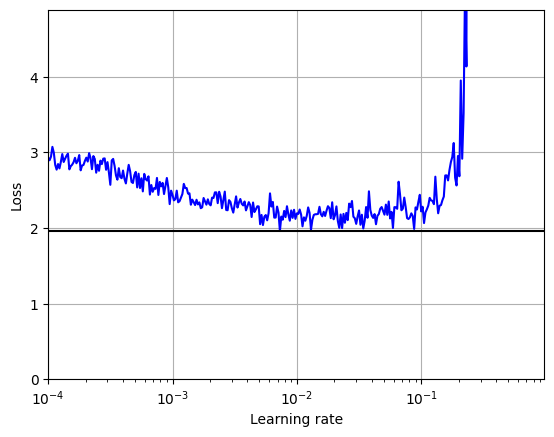

In [262]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [263]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

The `OneCycleScheduler` custom callback updates the learning rate at the beginning of each batch. It applies the logic described in the book: increase the learning rate linearly during about half of training, then reduce it linearly back to the initial learning rate, and lastly reduce it down to close to zero linearly for the very last part of training.

In [264]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr

In [265]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2896 - loss: 2.0353 - val_accuracy: 0.3722 - val_loss: 1.7790
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3796 - loss: 1.7582 - val_accuracy: 0.4186 - val_loss: 1.6854
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4256 - loss: 1.6288 - val_accuracy: 0.4446 - val_loss: 1.6104
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4570 - loss: 1.5415 - val_accuracy: 0.4360 - val_loss: 1.6400
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4772 - loss: 1.4819 - val_accuracy: 0.4368 - val_loss: 1.7092
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4923 - loss: 1.4356 - val_accuracy: 0.4478 - val_loss: 1.7186
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5064 - loss: 1.4005 - val_accuracy: 0.4532 - val_loss: 1.6769
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5314 - loss: 1.3266 - val_accu

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 50.7% to 52.0%).

In [266]:
model.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5150 - loss: 1.6064


[1.6063978672027588, 0.5149999856948853]

In [267]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5169 - loss: 1.6048


[1.6047502756118774, 0.5169000029563904]

I implemented 1cycle a bit different and the actual results are a bit different from the Authors comments. BN performed worse than Model without BN (probably because the learning rate the author chose is not ideal anymore. I think TF updates messed it up) Selu Model performed very good. Neither Alpha dropout performed best. MC dropout did not help much here (worse than not using MC dropout). 1cycle with sgd did very well. The learning rates I used in my models are what messed them up so bad. I have been doing question 8 for a very long time now because I was trying to find the optimal (or good enough) learning rate for each model. I now believe even more the author after this experience: learning rate is one of the most important hyperparameters.